In [5]:
import pandas as pd

df = pd.read_csv('dataset1_imp.csv')
df.head()

display(df)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39,no,no,8,6,no,occasionally,sometimes,high,0,no,not much,no
1,50-59,Male,no,yes,less than half an hr,28,no,no,8,6,yes,very often,sometimes,normal,0,no,not much,no
2,40-49,Male,no,no,one hr or more,24,no,no,6,6,no,occasionally,sometimes,normal,0,no,not much,no
3,50-59,Male,no,no,one hr or more,23,no,no,8,6,no,occasionally,sometimes,normal,0,no,not much,no
4,40-49,Male,no,no,less than half an hr,27,no,no,8,8,no,occasionally,sometimes,normal,0,no,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,less than 40,Male,yes,no,more than half an hr,25,no,no,8,6,no,often,sometimes,normal,0,no,not much,yes
946,60 or older,Male,yes,yes,more than half an hr,27,no,no,6,5,yes,occasionally,sometimes,high,0,no,quite often,yes
947,60 or older,Male,no,yes,none,23,no,no,6,5,yes,occasionally,sometimes,high,0,no,not much,no
948,60 or older,Male,no,yes,less than half an hr,27,no,yes,6,5,yes,occasionally,very often,high,0,no,not much,no


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Separate the numerical and categorical columns
numeric_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
categorical_cols = ['Age', 'Gender', 'Family_Diabetes', 'highBP', 'PhysicallyActive', 'Smoking', 'Alcohol', 'RegularMedicine', 'JunkFood', 'Stress', 'BPLevel', 'Pdiabetes', 'UriationFreq', 'Diabetic']

# Apply One-Hot Encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_categorical = encoder.fit_transform(df[categorical_cols])

# Create a datadrame for encoded categorical columns
encoded_categorical_df = pd.DataFrame(encoded_categorical.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combine the numerical and encoded categorical columns
processed_df = pd.concat([df[numeric_cols], encoded_categorical_df], axis=1)

#print(processed_df)
display(processed_df)

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_Low,BPLevel_high,BPLevel_low,BPLevel_normal,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39,8,6,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,28,8,6,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,24,6,6,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,23,8,6,0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,27,8,8,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25,8,6,0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
946,27,6,5,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
947,23,6,5,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
948,27,6,5,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [10]:
import matplotlib
import numpy as np
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Load the Heart.csv dataset
# X = processed_df.drop(['Diabetic_no', 'Diabetic_yes'], axis=1)
X = processed_df.drop(['Diabetic_no', 'Diabetic_yes', 'Age_less than 40', 'Age_40-49', 'Age_50-59', 'Age_60 or older'], axis=1)
Y = processed_df['Diabetic_yes']

# Prepare the K-Fold Cross Validation
n_folds = 10  # Set the number of folds
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
evaluation_results = []

# Train with (K-fold Cross Validation)
for train_index, test_index in kf.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy") # Set Maximum Depth and other criteria
    clf = clf.fit(x_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results.append(accuracy)
    
    # Print evaluation result for the current fold
    print("Accuracy for fold {}: {:.5f}".format(len(evaluation_results), accuracy))

print("Average accuracy across all folds: {:.4f}".format(np.mean(evaluation_results)))

Accuracy for fold 1: 0.85263
Accuracy for fold 2: 0.83158
Accuracy for fold 3: 0.84211
Accuracy for fold 4: 0.86316
Accuracy for fold 5: 0.85263
Accuracy for fold 6: 0.80000
Accuracy for fold 7: 0.84211
Accuracy for fold 8: 0.85263
Accuracy for fold 9: 0.85263
Accuracy for fold 10: 0.78947
Average accuracy across all folds: 0.8379


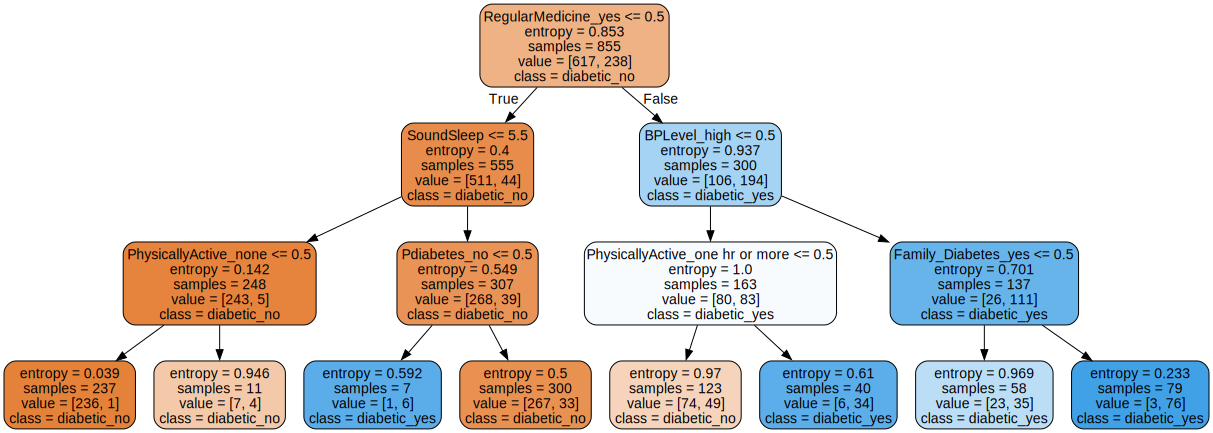

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

#class_names = Y.unique().astype(str) 

# Export the decision tree graph as Graphviz source code
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['diabetic_no','diabetic_yes'],filled=True, rounded=True, proportion=False)
graph = graphviz.Source(dot_data)
graph